In [1]:
import pandas as pd
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



import warnings
warnings.filterwarnings("ignore")
# Connect to my database

conn = psycopg2.connect(
    host="",
    port="",  
    database="",  
    user="",  
    password=""  
)

cursor = conn.cursor()

In [2]:
# Queries to get data for each school
query_ucla = """
SELECT date, location, opponent, 
       fg_1_19, fg_20_29, fg_30_39, fg_40_49, fg_50_plus, longest_fg, fg_percentage, fg_made, xp_made, points_scored, temp_f, precipitation_in, windspeed_mph, altitude_m, distance_from
FROM UCLA_Kicking_Stats;
"""
query_usc = """
SELECT date, location, opponent, 
       fg_1_19, fg_20_29, fg_30_39, fg_40_49, fg_50_plus, longest_fg, fg_percentage, fg_made, xp_made, points_scored, temp_f, precipitation_in, windspeed_mph, altitude_m, distance_from
FROM USC_Kicking_Stats;
"""
query_washington = """
SELECT date, location, opponent, 
       fg_1_19, fg_20_29, fg_30_39, fg_40_49, fg_50_plus, longest_fg, fg_percentage, fg_made, xp_made, points_scored, temp_f, precipitation_in, windspeed_mph, altitude_m, distance_from
FROM Washington_Kicking_Stats;
"""
query_oregon = """
SELECT date, location, opponent, 
       fg_1_19, fg_20_29, fg_30_39, fg_40_49, fg_50_plus, longest_fg, fg_percentage, fg_made, xp_made, points_scored, temp_f, precipitation_in, windspeed_mph, altitude_m, distance_from
FROM Oregon_Kicking_Stats;
"""

# Load the data into DataFrames
ucla_kicking = pd.read_sql(query_ucla, conn)
usc_kicking = pd.read_sql(query_usc, conn)
washington_kicking = pd.read_sql(query_washington, conn)
oregon_kicking = pd.read_sql(query_oregon, conn)

# FG data for each team
ucla_fg_data = ["2-2", "0-0", "1-1", "0-0", "2-4", "1-1", "0-2", "0-1", "1-3", "0", 
    "35", "0", "0", "1-3", "1-1", "4-4", "1-1", "1-1", "0-1", "3-3", 
    "1-2", "0-0", "0-1", "1-1", "2-3", "0-0", "1-1", "1-1", "1-1", "0-1", 
    "3-4", "2-2", "1-2", "1-2", "1-2", "1-2", "0-1", "2-2", "0-0", "0-0", 
    "0-0", "2-2", "1-1", "1-1", "2-3", "0-0", "0-1", "0-1", "1-1", "1-2", 
    "1-1", "2-2", "0-0", "1-2", "1-2", "0-1", "1-1", "1-1", "0-0", "0-0", 
    "3-3", "1-2", "3-3", "1-1", "1-2", "0-1", "0-1", "2-2", "2-3", "1-1", 
    "0-0", "1-1", "2-3", "2-2", "0-1", "1-1", "1-1", "1-1", "3-4", "1-2", 
    "3-3", "1-1", "3-4", "0-0", "1-2", "2-2", "1-2", "2-4", "0-0", "1-1", 
    "1-3", "1-1", "0-1", "1-1", "2-3", "3-3", "1-1", "0-0", "1-1", "2-2", 
    "4-4", "0-0", "2-2", "4-4", "1-2", "0-1", "0-1", "0-1", "0-0", "2-2", 
    "2-2", "0-1", "1-2", "3-3", "2-2", "1-2", "3-3", "1-1", "1-1", "2-2", 
    "1-2", "2-4", "1-1", "2-2", "3-3", "1-1", "0-0", "1-2", "1-1", "0-0", 
    "2-4", "0-0", "0-1"]
usc_fg_data = ["2-3", "1-1", "1-2", "0-0", "3-3", "0-0", "1-3", "0-0", "1-1", "2-4", "1-1", "1-1", "1-2", "3-3", "2-2", "1-1", "2-2", "3-3",
    "1-2", "1-2", "2-2", "3-4", "2-2", "3-3", "0-2", "0-0", "2-3", "4-4", "1-2", "1-2", "1-2", "1-1", "1-1", "2-2", "0-0", "0-0",
    "2-2", "2-2", "0-1", "1-1", "1-1", "2-2", "1-2", "1-2", "5-5", "1-2", "0-0", "1-1", "1-1", "1-1", "0-1", "0-0", "1-1", "0-0",
    "2-3", "1-1", "0-0", "0-0", "2-3", "3-3", "0-0", "1-1", "0-0", "2-2", "0-1", "0-1", "2-2", "2-2", "1-2", "0-0", "0-0", "2-3",
    "0-1", "1-1", "2-2", "1-1", "0-0", "0-1", "2-3", "0-0", "1-2", "0-0", "1-1", "0-1", "2-2", "1-2", "1-1", "2-2", "2-4", "0-0",
    "0-1", "1-2", "1-1", "1-1", "3-3", "1-1", "3-5", "0-0", "1-1", "1-1", "0-0", "2-3", "1-2", "0-1", "2-2", "1-2", "2-2", "0-0",
    "2-2", "1-1", "0-0", "1-2", "2-2", "1-1", "0-1", "2-2", "0-0", "1-1", "1-1", "0-0", "0-0", "1-1", "0-0", "1-1", "3-3", "0-2",
    "0-0", "1-2", "0-0", "1-1", "1-3", "4-5", "1-1", "0-1", "2-2", "1-1", "0-0", "1-1"] 
washington_fg_data = [
    "2-2", "0-0", "0-1", "2-2", "1-1", "1-1", "0-0", "3-3", "0-0", "1-1", "2-3", "0-1", "1-2", "2-2", "3-3", "2-2",
    "1-1", "1-1", "1-1", "4-4", "1-1", "1-1", "0-1", "2-3", "1-1", "3-3", "1-2", "1-1", "2-2", "0-1", "1-1", "1-1",
    "1-2", "1-1", "1-1", "0-0", "4-4", "0-0", "1-1", "1-2", "0-0", "2-3", "1-2", "1-2", "2-2", "1-1", "4-4", "1-1",
    "1-1", "2-2", "2-2", "3-3", "1-1", "0-0", "2-4", "0-0", "1-1", "1-1", "3-4", "1-1", "0-0", "2-2", "0-2", "1-1",
    "2-3", "2-2", "1-1", "2-2", "0-1", "0-0", "1-2", "1-1", "3-3", "0-1", "0-0", "1-3", "0-1", "0-1", "0-2", "3-3",
    "1-2", "0-0", "2-3", "2-2", "0-0", "2-3", "1-1", "0-0", "0-2", "1-1", "0-0", "2-2", "1-1", "1-1", "2-3", "3-3",
    "1-1", "2-2", "0-0", "2-3", "0-0", "1-1", "1-1", "1-2", "2-2", "0-0", "0-0", "3-3", "1-2", "1-1", "1-2", "3-3",
    "1-1", "1-1", "3-3", "1-1", "0-0", "1-2", "2-2", "1-2", "1-1", "3-3", "3-3", "1-1", "0-1", "1-1", "2-2", "0-0",
    "1-1", "0-0", "1-1", "1-1", "2-2", "1-1", "1-2", "2-2", "2-2", "1-1"
]  
oregon_fg_data = ["1-1", "3-3", "2-2", "0-0", "0-1", "1-2", "1-2", "0-0", "0-1", "1-2",
    "0-0", "1-2", "1-1", "1-1", "1-1", "0-0", "2-2", "3-3", "1-1", "0-0",
    "1-1", "0-0", "0-0", "2-3", "2-2", "2-2", "0-1", "1-1", "0-0", "2-2",
    "2-2", "1-1", "1-1", "0-0", "1-1", "1-1", "1-1", "0-2", "1-1", "1-2",
    "1-1", "0-1", "0-1", "1-2", "1-1", "1-1", "1-1", "1-1", "0-1", "0-0",
    "0-0", "0-1", "1-2", "1-1", "0-0", "3-3", "0-0", "0-1", "0-0", "1-2",
    "3-3", "0-0", "0-0", "0-0", "0-1", "1-1", "0-1", "1-2", "2-2", "0-0",
    "0-1", "1-2", "1-1", "0-0", "0-0", "0-0", "0-1", "0-0", "0-0", "1-1",
    "1-1", "0-0", "0-1", "2-2", "1-1", "2-3", "2-2", "0-0", "1-1", "1-1",
    "0-0", "1-1", "0-0", "0-0", "0-0", "4-5", "0-0", "0-1", "1-2", "1-1",
    "2-2", "0-0", "4-4", "0-0", "2-2", "1-1", "2-3", "2-2", "3-3", "1-1",
    "2-2", "1-2", "2-2", "0-0", "1-1", "0-0", "1-2", "1-1", "0-0", "1-2",
    "1-1", "1-1", "3-3", "1-1", "2-2", "3-4", "1-1", "2-2", "1-1", "1-1",
    "1-2", "0-0", "0-0", "1-1", "0-0", "0-1", "0-0", "1-1", "1-1", "1-2",
    "3-4"] 

# Add the FG data to the df
ucla_kicking['FG'] = ucla_fg_data
usc_kicking['FG'] = usc_fg_data
washington_kicking['FG'] = washington_fg_data
oregon_kicking['FG'] = oregon_fg_data

# Split FG column into separate columns for makes and attempts for each school
for df in [ucla_kicking, usc_kicking, washington_kicking, oregon_kicking]:
    df[['fg_makes', 'fg_attempts']] = df['FG'].str.split('-', expand=True)
    df['fg_makes'] = pd.to_numeric(df['fg_makes'], errors='coerce')
    df['fg_attempts'] = pd.to_numeric(df['fg_attempts'], errors='coerce')
    df['fg_percentage'] = (df['fg_makes'] / df['fg_attempts']) * 100
    df['fg_percentage'] = df['fg_percentage'].fillna(0)

# Combine the DataFrames into one
combined_kicking = pd.concat([ucla_kicking, usc_kicking, washington_kicking, oregon_kicking])
combined_kicking.reset_index(drop=True, inplace=True)

print(combined_kicking.head())


         date location                opponent  fg_1_19  fg_20_29  fg_30_39  \
0  2023-09-02        H        Coastal Carolina        0         0         1   
1  2023-09-09        @         San Diego State        0         0         0   
2  2023-09-16        H  North Carolina Central        0         1         0   
3  2023-09-23        @                    Utah        0         0         0   
4  2023-10-07        H        Washington State        0         0         2   

   fg_40_49  fg_50_plus  longest_fg  fg_percentage  ...  xp_made  \
0         1           0          47          100.0  ...        3   
1         0           0           0            0.0  ...        5   
2         0           0          24          100.0  ...        8   
3         0           0           0            0.0  ...        1   
4         0           0          37           50.0  ...        1   

   points_scored  temp_f  precipitation_in  windspeed_mph  altitude_m  \
0              9    73.4              0.03 

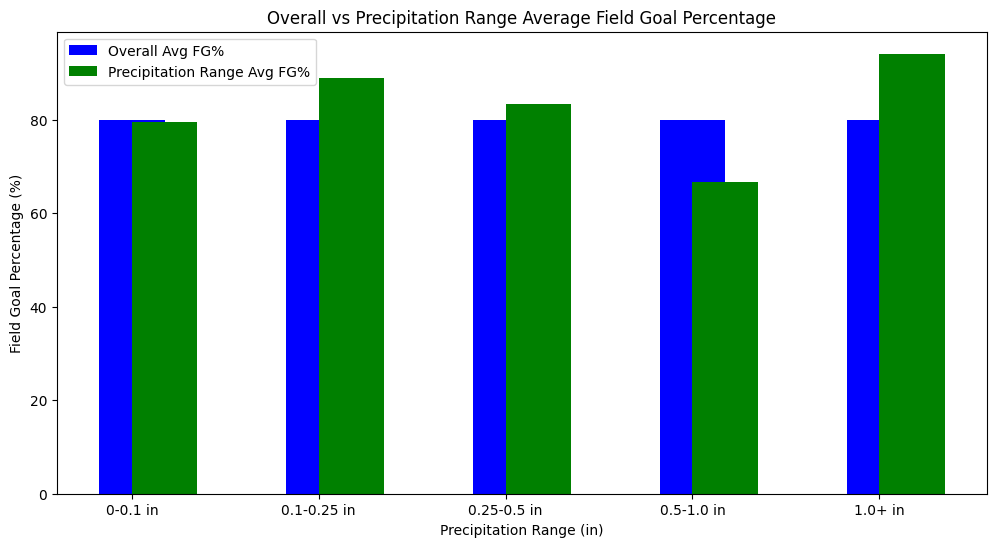

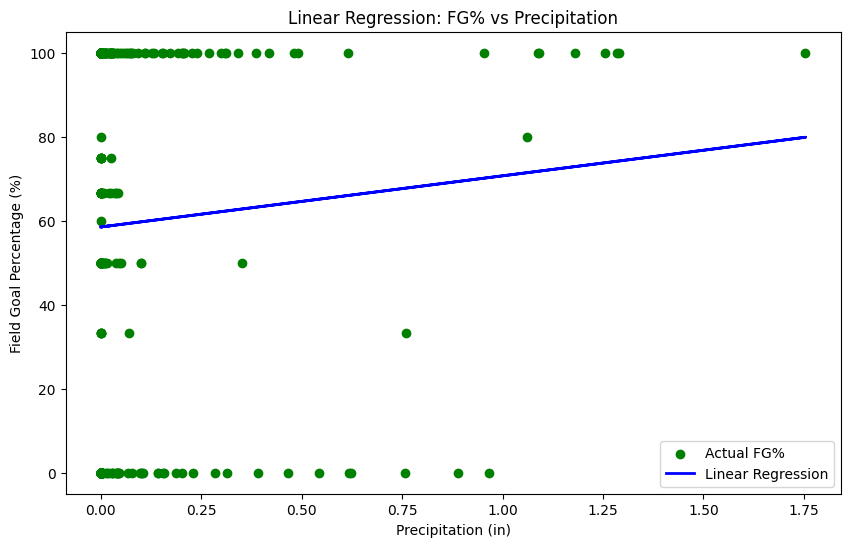

In [3]:
# Define precipitation ranges
precip_bins = [0, 0.1, 0.25, 0.5, 1.0, float('inf')]
precip_labels = ['0-0.1 in', '0.1-0.25 in', '0.25-0.5 in', '0.5-1.0 in', '1.0+ in']

# Create a new column in the dataframe for precipitation ranges
combined_kicking['Precipitation_Range'] = pd.cut(combined_kicking['precipitation_in'], bins=precip_bins, labels=precip_labels, right=False)

# Calculate total FG makes and attempts for each precipitation range
precip_fg_totals = combined_kicking.groupby('Precipitation_Range').agg({'fg_makes': 'sum', 'fg_attempts': 'sum'})

# Calculate FG percentage for each precipitation range
precip_fg_totals['Precipitation_Range_Avg_FG%'] = (precip_fg_totals['fg_makes'] / precip_fg_totals['fg_attempts']) * 100

# Calculate the overall FG percentage across all precipitation ranges
overall_fg_makes = combined_kicking['fg_makes'].sum()
overall_fg_attempts = combined_kicking['fg_attempts'].sum()
overall_avg_fg = (overall_fg_makes / overall_fg_attempts) * 100

# Prep data
avg_data_precip = pd.DataFrame({
    'Precipitation_Range': precip_fg_totals.index,
    'Overall_Avg_FG%': [overall_avg_fg] * len(precip_fg_totals),
    'Precipitation_Range_Avg_FG%': precip_fg_totals['Precipitation_Range_Avg_FG%'].values
})

# Plotting stuff
plt.figure(figsize=(12, 6))
bar_width = 0.35

plt.bar(avg_data_precip['Precipitation_Range'], avg_data_precip['Overall_Avg_FG%'], width=bar_width, label='Overall Avg FG%', color='blue', align='center')
plt.bar(avg_data_precip['Precipitation_Range'], avg_data_precip['Precipitation_Range_Avg_FG%'], width=bar_width, label='Precipitation Range Avg FG%', color='green', align='edge')

plt.xlabel('Precipitation Range (in)')
plt.ylabel('Field Goal Percentage (%)')
plt.title('Overall vs Precipitation Range Average Field Goal Percentage')
plt.legend()

plt.show()


# Linear Regression Example
from sklearn.linear_model import LinearRegression

# Prep data again
X = combined_kicking[['precipitation_in']].values
y = combined_kicking['fg_percentage'].values

# Fit
model = LinearRegression()
model.fit(X, y)

# Predict values using the model
y_pred = model.predict(X)

# Plotting the linear regression
plt.figure(figsize=(10, 6))
plt.scatter(combined_kicking['precipitation_in'], combined_kicking['fg_percentage'], color='green', label='Actual FG%')
plt.plot(combined_kicking['precipitation_in'], y_pred, color='blue', linewidth=2, label='Linear Regression')

plt.xlabel('Precipitation (in)')
plt.ylabel('Field Goal Percentage (%)')
plt.title('Linear Regression: FG% vs Precipitation')
plt.legend()

plt.show()


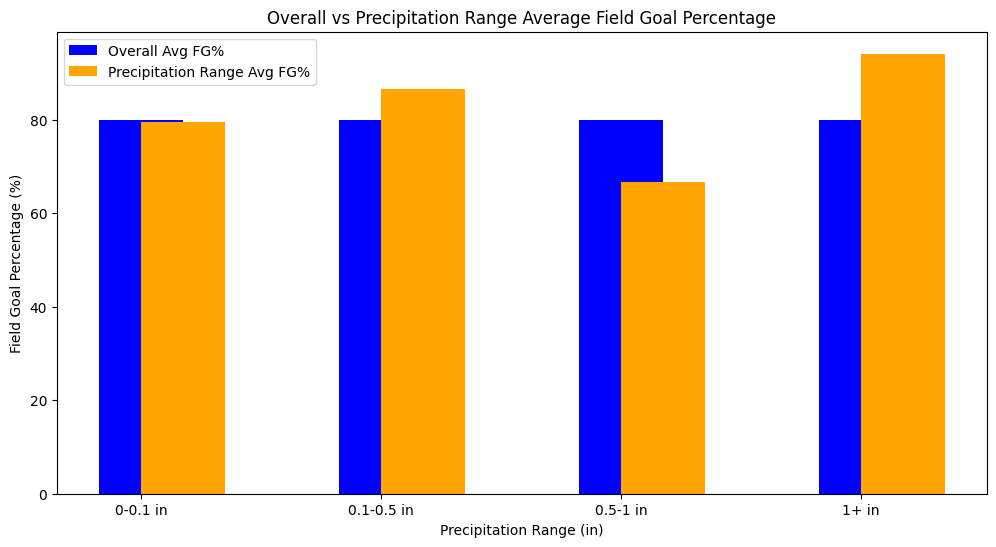

In [4]:
# precipitation bins
precipitation_bins = [0, 0.1, 0.5, 1, float('inf')]
precipitation_labels = ['0-0.1 in', '0.1-0.5 in', '0.5-1 in', '1+ in']

# Create a new column in the dataframe for precipitation ranges
combined_kicking['Precipitation_Range'] = pd.cut(combined_kicking['precipitation_in'], bins=precipitation_bins, labels=precipitation_labels, right=False)

# Calculate total FG makes and attempts for each precipitation range
precipitation_fg_totals = combined_kicking.groupby('Precipitation_Range').agg({'fg_makes': 'sum', 'fg_attempts': 'sum'})

# Calculate FG percentage for each precipitation range
precipitation_fg_totals['Precipitation_Range_Avg_FG%'] = (precipitation_fg_totals['fg_makes'] / precipitation_fg_totals['fg_attempts']) * 100

# Calculate the overall FG percentage across all precipitation ranges
overall_fg_makes = combined_kicking['fg_makes'].sum()
overall_fg_attempts = combined_kicking['fg_attempts'].sum()
overall_avg_fg = (overall_fg_makes / overall_fg_attempts) * 100


precip_data = pd.DataFrame({
    'Precipitation_Range': precipitation_fg_totals.index,
    'Overall_Avg_FG%': [overall_avg_fg] * len(precipitation_fg_totals),
    'Precipitation_Range_Avg_FG%': precipitation_fg_totals['Precipitation_Range_Avg_FG%'].values
})


plt.figure(figsize=(12, 6))
bar_width = 0.35

plt.bar(precip_data['Precipitation_Range'], precip_data['Overall_Avg_FG%'], width=bar_width, label='Overall Avg FG%', color='blue', align='center')
plt.bar(precip_data['Precipitation_Range'], precip_data['Precipitation_Range_Avg_FG%'], width=bar_width, label='Precipitation Range Avg FG%', color='orange', align='edge')

plt.xlabel('Precipitation Range (in)')
plt.ylabel('Field Goal Percentage (%)')
plt.title('Overall vs Precipitation Range Average Field Goal Percentage')
plt.legend()

plt.show()


In [5]:
# Define precipitation ranges
precip_bins = [0, 0.1, 0.25, 0.5, 1.0, float('inf')]
precip_labels = ['0-0.1 in', '0.1-0.25 in', '0.25-0.5 in', '0.5-1.0 in', '1.0+ in']

# Create a new column in the dataframe for precipitation ranges
combined_kicking['Precipitation_Range'] = pd.cut(combined_kicking['precipitation_in'], bins=precip_bins, labels=precip_labels, right=False)


In [6]:
# Group by Precipitation Range and sum the attempts for each FG range
precip_fg_attempts = combined_kicking.groupby('Precipitation_Range').agg({
    'fg_1_19': 'sum',
    'fg_20_29': 'sum',
    'fg_30_39': 'sum',
    'fg_40_49': 'sum',
    'fg_50_plus': 'sum'
})

# Display the results
print(precip_fg_attempts)


                     fg_1_19  fg_20_29  fg_30_39  fg_40_49  fg_50_plus
Precipitation_Range                                                   
0-0.1 in                   3       197       183       138          11
0.1-0.25 in                2         7        10         5           0
0.25-0.5 in                1         7         3         4           0
0.5-1.0 in                 0         3         1         1           1
1.0+ in                    0         6         6         4           0


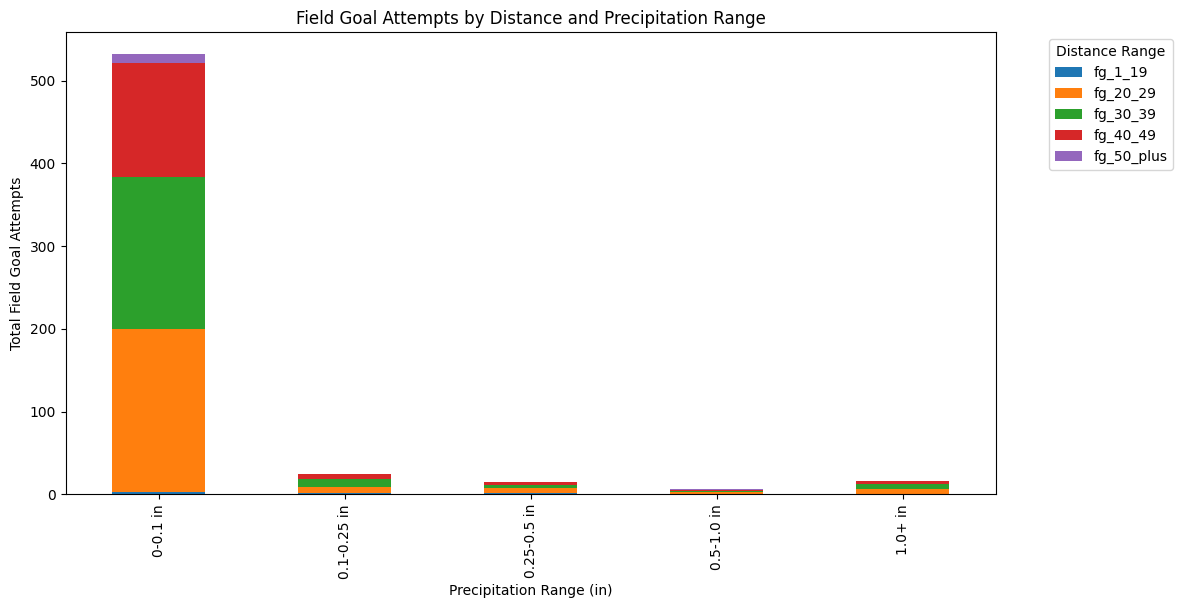

In [7]:
# Plotting
precip_fg_attempts.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.xlabel('Precipitation Range (in)')
plt.ylabel('Total Field Goal Attempts')
plt.title('Field Goal Attempts by Distance and Precipitation Range')
plt.legend(title='Distance Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Precipitation_Range
No Rain          464
Light Rain        68
Moderate Rain     39
Heavy Rain        22
Name: Total_FG_Attempts, dtype: int64


/var/folders/d0/gj8tfnxn3jd2gjx88tk4mp180000gn/T/ipykernel_98620/3173654516.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  precipitation_fg_totals = combined_kicking.groupby('Precipitation_Range')['Total_FG_Attempts'].sum()


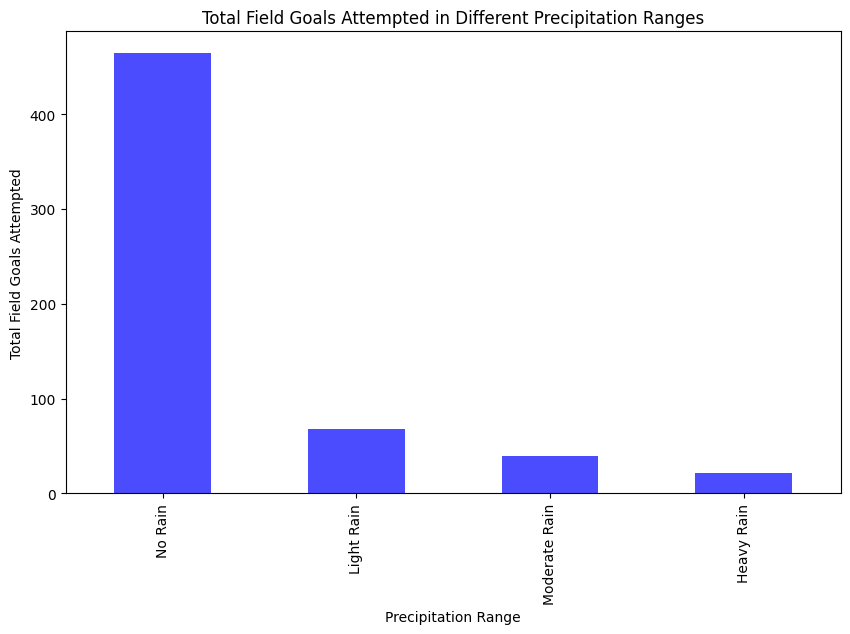

In [15]:
import pandas as pd

# Define the precipitation ranges
precipitation_bins = [0, 0.01, 0.1, 0.5, float('inf')]
precipitation_labels = ['No Rain', 'Light Rain', 'Moderate Rain', 'Heavy Rain']

# Create a new column in the combined dataframe for precipitation ranges
combined_kicking['Precipitation_Range'] = pd.cut(combined_kicking['precipitation_in'], bins=precipitation_bins, labels=precipitation_labels, right=False)

# Calculate the total number of field goals attempted in each game
combined_kicking['Total_FG_Attempts'] = combined_kicking[['fg_1_19', 'fg_20_29', 'fg_30_39', 'fg_40_49', 'fg_50_plus']].sum(axis=1)

# Group by precipitation range and calculate the total field goals attempted in each range
precipitation_fg_totals = combined_kicking.groupby('Precipitation_Range')['Total_FG_Attempts'].sum()

# Display the distribution
print(precipitation_fg_totals)

# Optional: Plotting the distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
precipitation_fg_totals.plot(kind='bar', color='blue', alpha=0.7)
plt.xlabel('Precipitation Range')
plt.ylabel('Total Field Goals Attempted')
plt.title('Total Field Goals Attempted in Different Precipitation Ranges')
plt.show()


Precipitation_Range
No Rain          1.081585
Light Rain       1.062500
Moderate Rain    0.975000
Heavy Rain       1.294118
Name: Total_FG_Attempts, dtype: float64


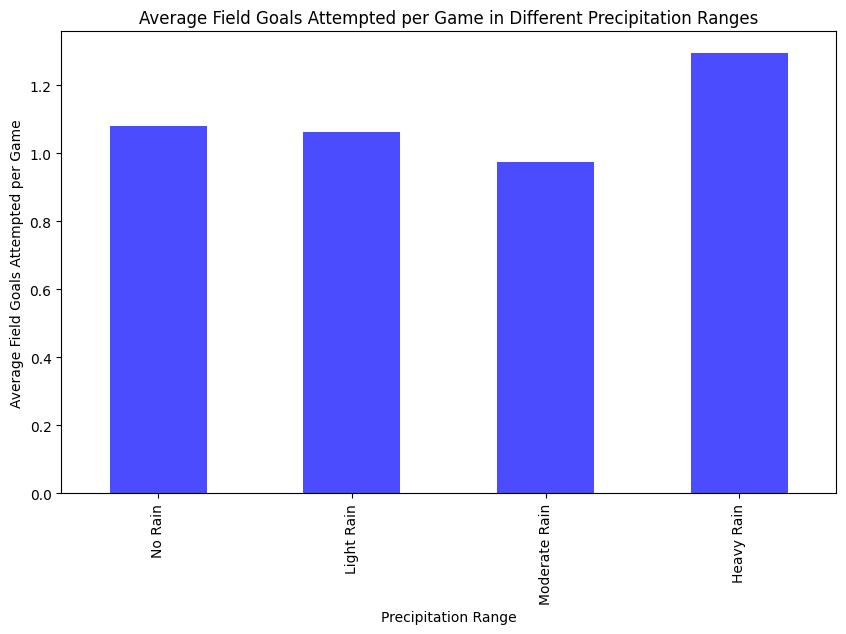

In [8]:
import pandas as pd

# Define the precipitation ranges
precipitation_bins = [0, 0.01, 0.1, 0.5, float('inf')]
precipitation_labels = ['No Rain', 'Light Rain', 'Moderate Rain', 'Heavy Rain']

# Create a new column in the combined dataframe for precipitation ranges
combined_kicking['Precipitation_Range'] = pd.cut(combined_kicking['precipitation_in'], bins=precipitation_bins, labels=precipitation_labels, right=False)

# Calculate the total number of field goals attempted in each game
combined_kicking['Total_FG_Attempts'] = combined_kicking[['fg_1_19', 'fg_20_29', 'fg_30_39', 'fg_40_49', 'fg_50_plus']].sum(axis=1)

# Group by precipitation range and calculate the average field goals attempted per game
precipitation_fg_avg = combined_kicking.groupby('Precipitation_Range')['Total_FG_Attempts'].mean()

# Display the distribution
print(precipitation_fg_avg)

# Optional: Plotting the average number of field goals attempted per game in each precipitation range
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
precipitation_fg_avg.plot(kind='bar', color='blue', alpha=0.7)
plt.xlabel('Precipitation Range')
plt.ylabel('Average Field Goals Attempted per Game')
plt.title('Average Field Goals Attempted per Game in Different Precipitation Ranges')
plt.show()


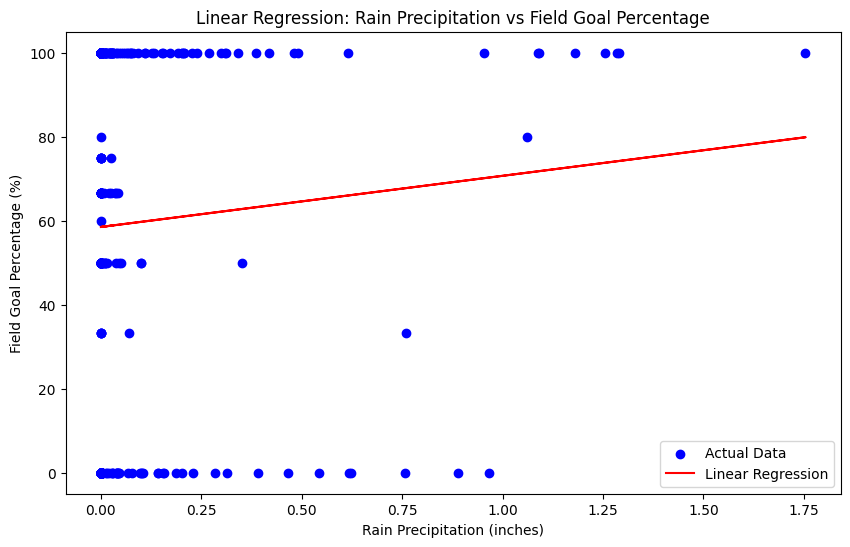

In [9]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare the data for linear regression
X_rain = combined_kicking['precipitation_in'].values.reshape(-1, 1)  # Reshape to fit the model
y_fg_rain = combined_kicking['fg_percentage']

# Create and fit the linear regression model
model_rain = LinearRegression()
model_rain.fit(X_rain, y_fg_rain)

# Predict using the model
y_pred_rain = model_rain.predict(X_rain)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(combined_kicking['precipitation_in'], y_fg_rain, color='blue', label='Actual Data')
plt.plot(combined_kicking['precipitation_in'], y_pred_rain, color='red', label='Linear Regression')
plt.xlabel('Rain Precipitation (inches)')
plt.ylabel('Field Goal Percentage (%)')
plt.title('Linear Regression: Rain Precipitation vs Field Goal Percentage')
plt.legend()
plt.show()


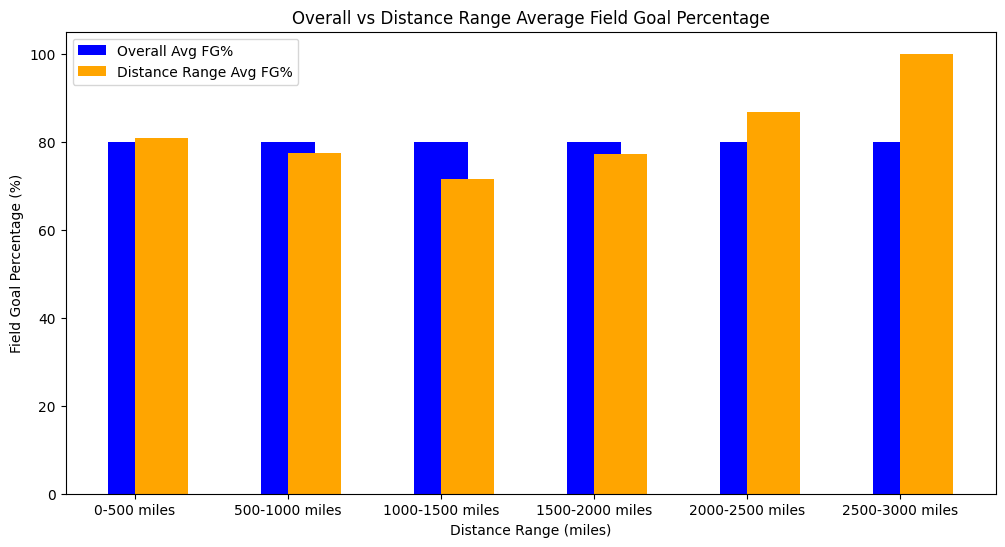

In [10]:
# Define the distance ranges (in miles)
distance_bins = [0, 500, 1000, 1500, 2000, 2500, 3000]
distance_labels = ['0-500 miles', '500-1000 miles', '1000-1500 miles', '1500-2000 miles', '2000-2500 miles', '2500-3000 miles']

# Create a new column in the dataframe for distance ranges
combined_kicking['Distance_Range'] = pd.cut(combined_kicking['distance_from'], bins=distance_bins, labels=distance_labels, right=False)

# Calculate total FG makes and attempts for each distance range
distance_fg_totals = combined_kicking.groupby('Distance_Range').agg({'fg_makes': 'sum', 'fg_attempts': 'sum'})

# Calculate FG percentage for each distance range
distance_fg_totals['Distance_Range_Avg_FG%'] = (distance_fg_totals['fg_makes'] / distance_fg_totals['fg_attempts']) * 100

# Calculate the overall FG percentage across all distance ranges
overall_fg_makes = combined_kicking['fg_makes'].sum()
overall_fg_attempts = combined_kicking['fg_attempts'].sum()
overall_avg_fg = (overall_fg_makes / overall_fg_attempts) * 100

# Prepare data for plotting
distance_avg_data = pd.DataFrame({
    'Distance_Range': distance_fg_totals.index,
    'Overall_Avg_FG%': [overall_avg_fg] * len(distance_fg_totals),
    'Distance_Range_Avg_FG%': distance_fg_totals['Distance_Range_Avg_FG%'].values
})

# Plotting
plt.figure(figsize=(12, 6))
bar_width = 0.35

plt.bar(distance_avg_data['Distance_Range'], distance_avg_data['Overall_Avg_FG%'], width=bar_width, label='Overall Avg FG%', color='blue', align='center')
plt.bar(distance_avg_data['Distance_Range'], distance_avg_data['Distance_Range_Avg_FG%'], width=bar_width, label='Distance Range Avg FG%', color='orange', align='edge')

plt.xlabel('Distance Range (miles)')
plt.ylabel('Field Goal Percentage (%)')
plt.title('Overall vs Distance Range Average Field Goal Percentage')
plt.legend()

plt.show()


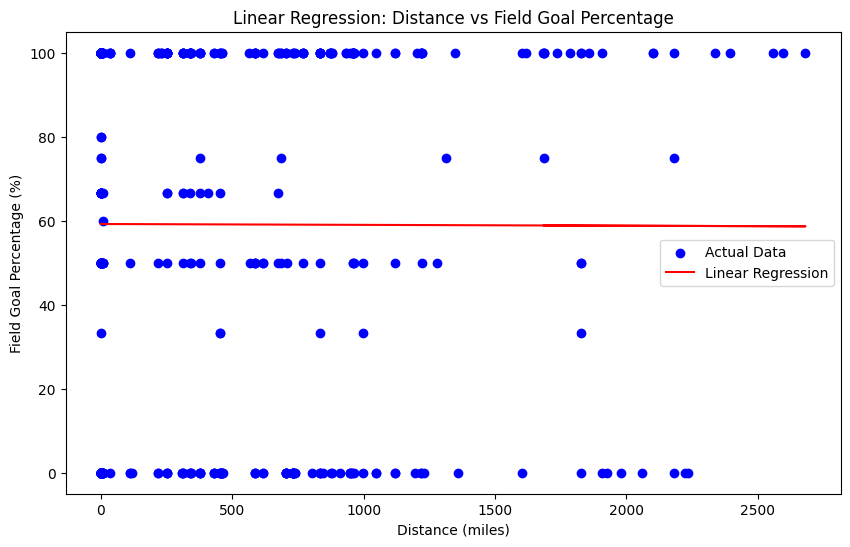

In [11]:
# Prepare the data for linear regression
X_distance = combined_kicking['distance_from'].values.reshape(-1, 1) 
y_fg_distance = combined_kicking['fg_percentage']

# Create and fit the linear regression model
model_distance = LinearRegression()
model_distance.fit(X_distance, y_fg_distance)


y_pred_distance = model_distance.predict(X_distance)


plt.figure(figsize=(10, 6))
plt.scatter(combined_kicking['distance_from'], y_fg_distance, color='blue', label='Actual Data')
plt.plot(combined_kicking['distance_from'], y_pred_distance, color='red', label='Linear Regression')
plt.xlabel('Distance (miles)')
plt.ylabel('Field Goal Percentage (%)')
plt.title('Linear Regression: Distance vs Field Goal Percentage')
plt.legend()
plt.show()
